# Atividades Visão Computacional 2024.1

Luís Fernando de Sá Amorim - 472095

No presente arquivo mostra todas atividades realizadas na disciplina durante o presente semestre

# LAB 01

Trocar a cor de pele das personagens na imagem 1.jpg. As demais partes da imagem devem permanecer inalteradas.

- Status: Feito

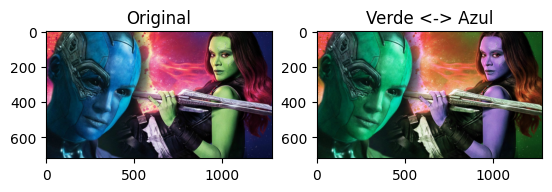

In [1]:
import cv2
import matplotlib.pyplot as plt

# Definindo diretamente o nome do arquivo
filename = 'Imagens/gamora_nebula.jpg'

# Carregar a imagem usando OpenCV
img = cv2.imread(filename)

# Trocar o canal azul (B) pelo verde (G) e vice-versa
img_inverted = img.copy()
# Swap the Blue (B) and Green (G) channels
img_inverted[:, :, 0] = img[:, :, 1]  # Canal Verde
img_inverted[:, :, 1] = img[:, :, 0]  # Canal Azul
img_inverted[:, :, 2] = img[:, :, 2]  # Canal Vermelho permanece o mesmo

# Exibir as imagens usando matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Mostra a imagem original em cores
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_inverted, cv2.COLOR_BGR2RGB))  # Mostra a imagem com cores invertidas
plt.title('Verde <-> Azul')

plt.show()

# LAB 02

1) Deixar a imagem do arquivo 'jato.jpg' mais amarelada usando transformação gamma

- Feito?

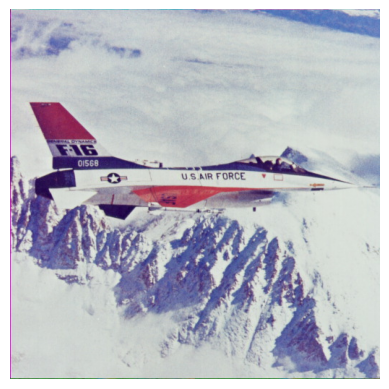

interactive(children=(FloatSlider(value=1.0, description='Gamma:', max=3.5, min=0.1), Output()), _dom_classes=…

Output()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, interact, Output
from IPython.display import display

def gamma_correction_LUT(img, gamma, c=1.0):
    # Cria uma Lookup Table (LUT)
    GAMMA_LUT = np.array([c * ((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    
    # Aplica a transformação usando LUT
    return cv2.LUT(img, GAMMA_LUT)

def update_image(gamma):
    im_gamma = gamma_correction_LUT(im, gamma)
    plt.imshow(cv2.cvtColor(im_gamma, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Não mostra eixos
    plt.show()  # Atualiza a imagem exibida

def update_output(gamma):
    gamma_scaled = 10 ** (gamma - 1)  # Logarithmic scaling
    with out:
        out.clear_output(wait=True)  # Limpa o output anterior
        update_image(gamma_scaled)

# Abre imagem
filename = 'imagens/jato.jpg'
im = cv2.imread(filename)

# Inicializa a figura do Matplotlib
plt.ion()  # Enable interactive mode
plt.figure('image')

# Exibe a imagem original inicialmente
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Não mostra eixos
plt.show()

# Cria um Output widget para exibir a imagem
out = Output()

# Cria um slider para ajustar gamma
gamma_slider = FloatSlider(value=1.0, min=0.1, max=3.5, step=0.1, description='Gamma:')
interact(update_output, gamma=gamma_slider)

# Exibe o Output widget
display(out)

2) Utilizando como base as figuras ‘circle.jpg’ e ‘line.jpg’, forme o desenho de um “boneco
palito” aplicando uma sequência de transformações geométricas e operações lógicas nas
imagens, seguindo as regras abaixo.

– A figura resultante deve ter um tamanho de 300x300.

– Use cópias da figura ‘line.jpg’ para os braços, pernas e tronco do boneco.

– Não redimensione as imagens para criar o tronco e a cabeça.

– Cada braço deve ter 75% do tamanho do tronco.

– As pernas devem estar em um ângulo de 90º entre si e devem ter o dobro do tamanho dos
braços.

– Posicione o boneco no centro da imagem.

- Feito

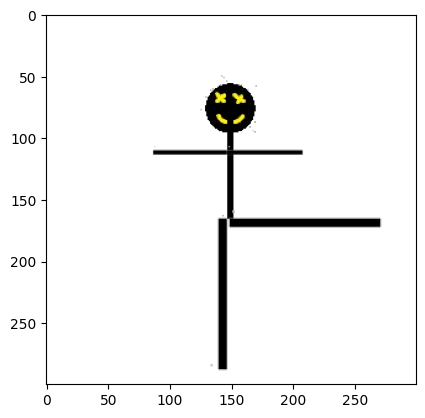

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images
circle_img = Image.open('imagens/circle.jpg')
line_img = Image.open('imagens/line.jpg')

# Convert images to RGBA mode
circle_img = circle_img.convert('RGBA')
line_img = line_img.convert('RGBA')

# Remove white background and make images transparent
circle_img_array = np.array(circle_img)
circle_img_array[(circle_img_array[:, :, 0] > 245) & (circle_img_array[:, :, 1] > 245) & (circle_img_array[:, :, 2] > 245), 3] = 0
circle_img = Image.fromarray(circle_img_array)

line_img_array = np.array(line_img)
line_img_array[(line_img_array[:, :, 0] > 245) & (line_img_array[:, :, 1] > 245) & (line_img_array[:, :, 2] > 245), 3] = 0
line_img = Image.fromarray(line_img_array)

# Create the head
head = circle_img

# Create the torso
torso = line_img.rotate(90)  # Rotate the torso 90 degrees

# Create the arms
arm_width, arm_height = int(torso.width * 0.75), int(torso.height * 0.75)
arm_img = line_img.resize((arm_width, arm_height))
arm1 = arm_img
arm2 = arm_img

# Create the legs
leg_width, leg_height = int(arm_width * 2), int(arm_height * 2)
leg_img = line_img.resize((leg_width, leg_height))
leg1 = leg_img
leg2 = leg_img.rotate(90)

# Assemble the figure
stick_figure = Image.new('RGBA', (300, 300), (0, 0, 0, 0))  # Create a transparent background
stick_figure.paste(head, (100, 25), head)  # Position the head
stick_figure.paste(torso, (100, 75), torso)  # Position the torso
stick_figure.paste(arm1, (80, 75), arm1)  # Position the left arm
stick_figure.paste(arm2, (140, 75), arm2)  # Position the right arm
stick_figure.paste(leg1, (135, 95), leg1)  # Position the left leg
stick_figure.paste(leg2, (69, 152), leg2)  # Position the right leg

# Display the resulting image
plt.imshow(stick_figure)
plt.show()

# LAB 03

2) Escolha uma imagem qualquer colorida e aplique um ou mais filtros convolucionais, de
forma a resultar em uma imagem em tons de cinza.


Considere a fórmula abaixo, onde Y é o valor do pixel em tons de cinza e R, G e B
correspondem aos valores dos pixels nos canais Vermelho, Verde e Azul, respectivamente.


Y=(0,3×R)+(0,59×G)+(0,11×B)

Feito


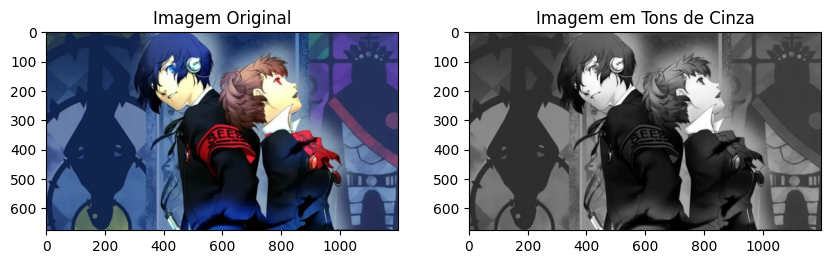

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
img = cv2.imread('imagens/persona.jpg')

# Verificar se a imagem foi carregada corretamente
if img is None:
    print("Erro ao carregar a imagem.")
    exit()

# Converter para escala de cinza, independentemente do tipo de dado
R, G, B = cv2.split(img)
Y = (0.3 * R) + (0.59 * G) + (0.11 * B)

# Converter o resultado para 8 bits, se necessário
if img.dtype != np.uint8:
    Y = cv2.convertScaleAbs(Y)

# Converter de volta para 3 canais
gray_img = cv2.cvtColor(Y.astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Exibir as imagens lado a lado
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem Original')

ax[1].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem em Tons de Cinza')

plt.show()

3) Repita a questão anterior, mas dessa vez a imagem resultante deve ter uma coloração sépia. 

Feito

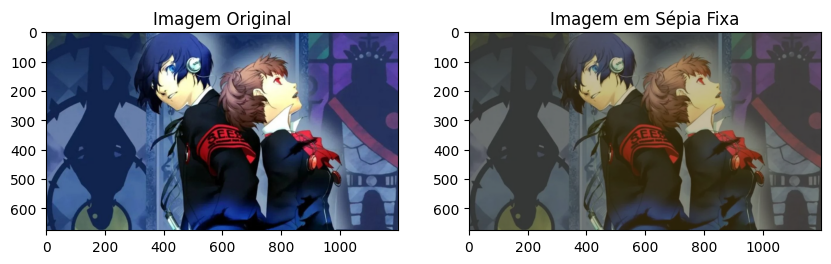

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
img = cv2.imread('imagens/persona.jpg')

# Verificar se a imagem foi carregada corretamente
if img is None:
    print("Erro ao carregar a imagem.")
    exit()

# Criar uma imagem da cor sépia fixa (108, 84, 19)
sepia_color = np.array([19, 84, 108], dtype=np.uint8)  # Cor BGR

# Aplicar uma mistura da imagem original com o filtro sépia
sepia_img = cv2.addWeighted(img, 0.6, np.full_like(img, sepia_color), 0.4, 0)

# Exibir as imagens lado a lado
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem Original')

ax[1].imshow(cv2.cvtColor(sepia_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem em Sépia Fixa')

plt.show()

# RANSAC

Feito

- Implementar o RANSAC para detecção da função da reta na imagem  'pontos_ransac.png' .

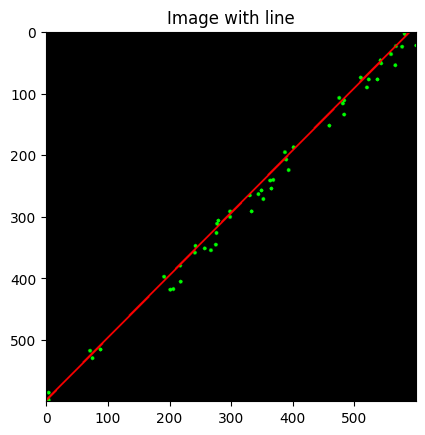

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Imagens/pontos_ransac.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

def ransac_line(edges, num_samples=2, threshold=0.5, max_trials=1000):
    # Get the indices of the edges
    indices = np.argwhere(edges > 0)

    # Initialize the best line parameters
    best_line = None
    best_inliers = 0

    for _ in range(max_trials):
        # Randomly select two points from the edges
        idx1, idx2 = np.random.choice(indices.shape[0], 2, replace=False)
        x1, y1 = indices[idx1]
        x2, y2 = indices[idx2]

        # Check if the points are vertical
        if x2 - x1 == 0:
            continue

        # Calculate the slope and intercept of the line
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1

        # Check if the slope or intercept is NaN or infinity
        if np.isnan(slope) or np.isinf(slope) or np.isnan(intercept) or np.isinf(intercept):
            continue

        # Calculate the inliers
        inliers = 0
        for x, y in indices:
            if np.abs(y - (slope * x + intercept)) < threshold:
                inliers += 1

        # Update the best line parameters
        if inliers > best_inliers:
            best_inliers = inliers
            best_line = (slope, intercept)

    return best_line

line_params = ransac_line(edges)
slope, intercept = line_params

# Draw a red line on top of the detected line
x1, y1 = 0, int(intercept)
x2, y2 = img.shape[1], int(slope * img.shape[1] + intercept)
cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the output image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with line')
plt.show()

# HOMOGRAFIA

Feito

- Corrigir o código para permitir a visualização completa da imagem após a transformação.

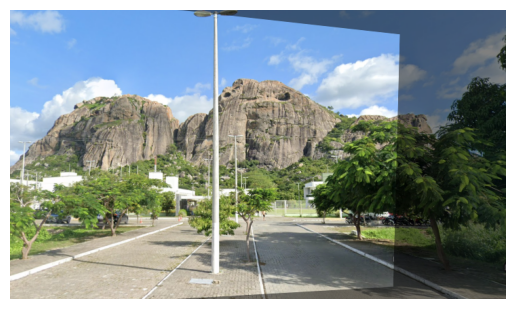

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

# Carregar imagens
image1 = cv2.imread("Imagens/campus_quixada1.png")
image2 = cv2.imread("Imagens/campus_quixada2.png")

# Verificar se as imagens foram carregadas corretamente
if image1 is None or image2 is None:
    raise AssertionError("Erro ao carregar imagens")

# Reduzir tamanho das imagens para melhor visualização
h1, w1 = image1.shape[:2]
h2, w2 = image2.shape[:2]
image1 = cv2.resize(image1, (int(w1*0.5), int(h1*0.5)))
image2 = cv2.resize(image2, (int(w2*0.5), int(h2*0.5)))

# Converter para escala de cinza
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Encontrar keypoints e descriptors com SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Verificar se há keypoints suficientes
if len(kp1) < 4 or len(kp2) < 4:
    raise AssertionError("Não há keypoints suficientes")

# Matching de keypoints com BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Aplicar ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Verificar se há matches suficientes
if len(good) < 4:
    raise AssertionError("Não há matches suficientes")

# Extrair localizações dos bons matches
pts1 = []
pts2 = []
for m in good:
    pts1.append(kp1[m[0].queryIdx].pt)
    pts2.append(kp2[m[0].trainIdx].pt)

# Matrix points
points1 = np.float32(pts1).reshape(-1, 1, 2)
points2 = np.float32(pts2).reshape(-1, 1, 2)

# Encontrar homografia usando RANSAC
transformation_matrix, inliers = cv2.findHomography(points1, points2, cv2.RANSAC)

# Verificar se a transformação de homografia é precisa
if transformation_matrix is None:
    raise AssertionError("Erro ao calcular a transformação de homografia")

# Combinar imagens
height, width = img2.shape
img1_transformed = cv2.warpPerspective(image1, transformation_matrix, (width, height))

# Criar uma imagem para mostrar a combinação
combined_img = cv2.addWeighted(img1_transformed, 0.5, image2, 0.5, 0)

# Mostrar a imagem combinada usando matplotlib
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# CNN

- Reconhecimento de digitos com rede treinada a partir do MNIST.

- Autoencoder para colorir os digitos do MNIST (Os pares devem ficar azul e os ímpares vermelho)

* Usar como base os códigos disponíveis em keras.io :

https://keras.io/examples/vision/mnist_convnet/

https://keras.io/examples/vision/autoencoder/

Feito

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt
# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# redimensiona
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converter 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# modelo CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# treinar o modelo
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
def color_digits(predictions, x_test):
    # Para cada imagem no conjunto de teste
    colored_images = []
    for i in range(len(predictions)):
        img = x_test[i].reshape(28, 28)
        img_colored = np.zeros((28, 28, 3), dtype=np.uint8)  

        # colorir
        if predictions[i] % 2 == 0:
            img_colored[:, :, 2] = img * 255 
        else:
            img_colored[:, :, 0] = img * 255 

        colored_images.append(img_colored)
    
    return colored_images
# Prever
predictions = np.argmax(model.predict(x_test), axis=1)

# Colorir 
colored_digits = color_digits(predictions, x_test)

# testar
for i in range(10):
    plt.imshow(colored_digits[i])
    plt.show()

# FACE RECOGNITION

- Comparar método do Haar Cascade com Yolo e Retinaface. Use como base algumas fotos contendo vários rostos. Mostre o valor médio de IoU obtido em cada caso e também os bounding boxes desenhados nas imagens.

links úteis:

https://yolov8.org/yolov8-face-detection/
https://github.com/serengil/retinaface
https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
https://github.com/opencv/opencv/tree/master/data/haarcascades

Feito

In [ ]:
pip install tensorflow==2.1.0

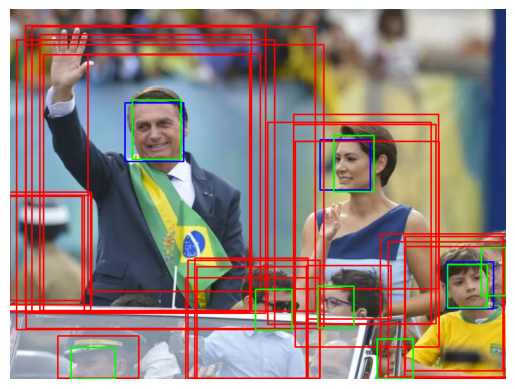

IoU Scores:
Haar Cascade IoU (vs RetinaFace): 0.2076
YOLO IoU (vs RetinaFace): 0.0109


In [1]:
import cv2
import numpy as np
from retinaface import RetinaFace
import matplotlib.pyplot as plt

# Função para calcular o IoU entre dois bounding boxes
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Coordenadas das interseções
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # Áreas das caixas
    box1_area = w1 * h1
    box2_area = w2 * h2

    # União
    union_area = box1_area + box2_area - inter_area

    # IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Função para desenhar os bounding boxes em uma imagem
def draw_boxes(img, boxes, color=(0, 255, 0)):
    for (x, y, w, h) in boxes:
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

# Função para detectar faces usando Haar Cascade
def detect_faces_haar(img):
    haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

# Função para detectar faces usando YOLO
def detect_faces_yolo(img):
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Pré-processar a imagem
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    height, width = img.shape[:2]
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if class_id == 0 and confidence > 0.5:  # 0 representa a classe 'pessoa'
                center_x, center_y, w, h = detection[0:4] * np.array([width, height, width, height])
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, int(w), int(h)])
    return boxes

# Função para detectar faces usando RetinaFace
def detect_faces_retinaface(img_path):
    resp = RetinaFace.detect_faces(img_path)
    faces = []
    if isinstance(resp, dict):
        for key in resp:
            identity = resp[key]
            facial_area = identity["facial_area"]  # Coordenadas do rosto detectado
            x, y, x2, y2 = facial_area
            w, h = x2 - x, y2 - y
            faces.append([x, y, w, h])
    return faces

# Função principal para realizar a comparação
def compare_face_detection(img_path):
    img = cv2.imread(img_path)

    # Haar Cascade
    haar_faces = detect_faces_haar(img.copy())
    draw_boxes(img, haar_faces, color=(255, 0, 0))  # Azul

    # YOLO
    yolo_faces = detect_faces_yolo(img.copy())
    draw_boxes(img, yolo_faces, color=(0, 0, 255))  # Vermelho

    # RetinaFace
    retina_faces = detect_faces_retinaface(img_path)
    draw_boxes(img, retina_faces, color=(0, 255, 0))  # Verde

    # Exibir imagem com bounding boxes usando matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Calcular IoU
    print("IoU Scores:")
    haar_iou = np.mean([calculate_iou(hf, rf) for hf, rf in zip(haar_faces, retina_faces)]) if len(haar_faces) > 0 and len(retina_faces) > 0 else 0
    yolo_iou = np.mean([calculate_iou(yf, rf) for yf, rf in zip(yolo_faces, retina_faces)]) if len(yolo_faces) > 0 and len(retina_faces) > 0 else 0

    print(f"Haar Cascade IoU (vs RetinaFace): {haar_iou:.4f}")
    print(f"YOLO IoU (vs RetinaFace): {yolo_iou:.4f}")

# Testes
compare_face_detection('Imagens/bolsonabo.jpg')
